In [1]:
pip install seaborn


     ------------------------------------ 285.1/285.1 kB 255.0 kB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
donnees = pd.read_csv("diabetes.csv")
donnees

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


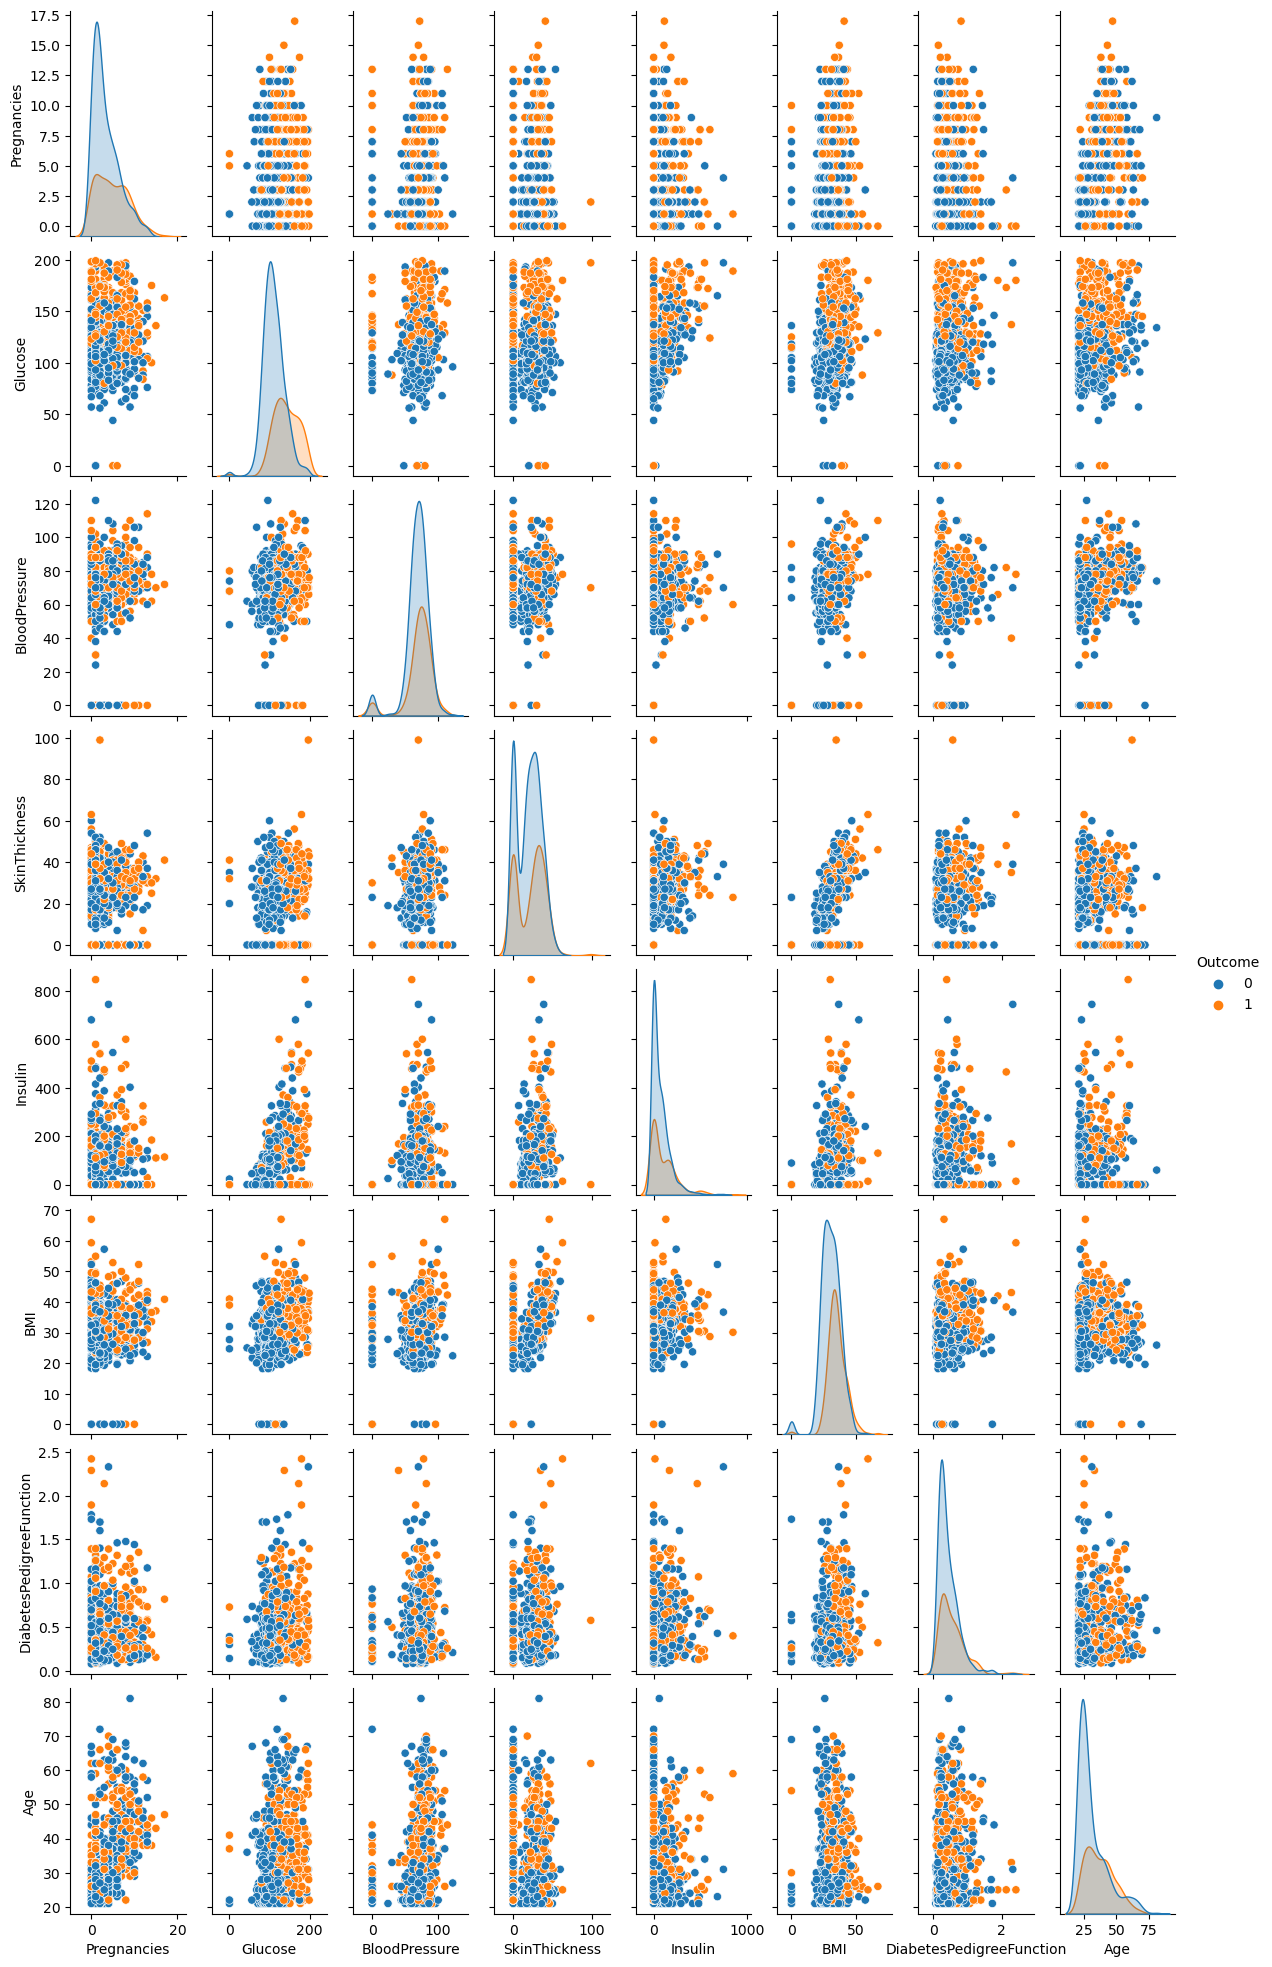

In [6]:
import seaborn as sns
sns.pairplot(donnees, aspect=0.6, hue = "Outcome")

In [7]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
donnees.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
copieDonnes = donnees.dropna()
if len(copieDonnes) > len(donnees):
    print("Il y'a des valeurs NaN")
else:
    print("Il y'a pas de valeurs NaN")

Il y'a pas de valeurs NaN


In [10]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

y = donnees["Outcome"]
X = donnees.drop(["Outcome"], axis=1)

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)
#sur entrainer car on utilise toute la base d'apprentissage

1.0


In [11]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage


accuracy = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test, y_test))
    
#Les scores ne varient que très peu, la variance et l'écart type sont doc faible (indictauer de dispensersion)
print("ValeurMax : ", np.max(accuracy)," valeurMin : ", np.min(accuracy))

print("Moyenne: ", np.mean(accuracy), "Ecart type: ",np.std(accuracy))

variance = np.var(accuracy)
print("variance : ", variance)

ValeurMax :  0.7572254335260116  valeurMin :  0.6098265895953757
Moyenne:  0.6739161849710982 Ecart type:  0.02914448273232011
variance :  0.0008494008737345051


In [12]:
accuracy2 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy2.append(clf.score(X_test,y_test))
    
print("ValeurMax : ", np.max(accuracy2)," valeurMin : ", np.min(accuracy2))

print("Moyenne: ", np.mean(accuracy2), "Ecart type: ",np.std(accuracy2))

variance = np.var(accuracy2)
print("variance : ", variance)
        

ValeurMax :  0.7760115606936416  valeurMin :  0.6705202312138728
Moyenne:  0.7275433526011561 Ecart type:  0.020639379725561336
variance :  0.00042598399545591237


On remarqu'avec le classifieur Bagging on a une variance plus faible qu'avec le classifieur DecisionTreeClassifier les données très dispersés.
On peut donc en déduire que le score est plus stable avace le classifieur Bagging, car l'écart entre la valeur max et la valeur minimum est plus faible qu'avec le classifieur de base. C'est pour cela que l'écart-type et la varaince sont plus faible

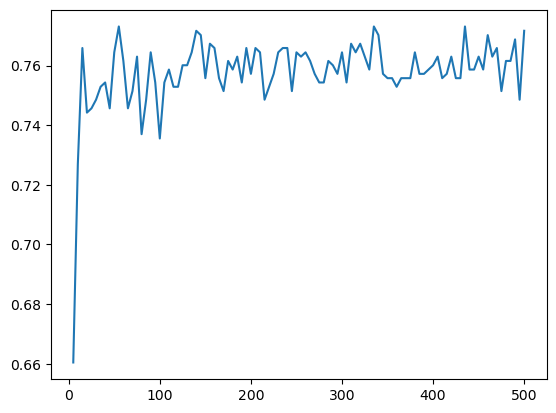

In [33]:
accuracy.clear()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

for i in range(1,101):
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i*5)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))
    

plt.plot([(i*5) for i in range(1,101)], accuracy)
plt.show()

Nous avons fait une boucle où l'on fait varier le paramètre n_estimators jusqu'à 500. On remarque qu'à partir de n_estimators=200, l'accuracy se "stabilise".

In [14]:
accuracy.clear()
maximum = 0
maxI = 0
maxJ = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

for i in range(1,10):
    for j in range(1,10):
        clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=i/10, max_features=j/10, n_estimators=200)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        if clf.score(X_test,y_test) > maximum :
            maximum = clf.score(X_test,y_test)
            maxI = i/10
            maxJ = j/10
            print(clf.score(X_test,y_test))
        accuracy.append(clf.score(X_test,y_test))
    
print("Score : ", np.max(accuracy), " pour max_samples = ", maxI, " pour max_features = ",maxJ )

0.6994219653179191
0.7109826589595376
0.7369942196531792
0.7456647398843931
0.7586705202312138
Score :  0.7586705202312138  pour max_samples =  0.1  pour max_features =  0.8


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

score = 0.74

while score <= 0.74:
    tuned_params = {"max_samples":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2], "max_features":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
    grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators = 200), param_grid=tuned_params, cv=2)
    grid_search.fit(X_train, y_train)
    score = grid_search.best_estimator_.score(X_test, y_test)
print(score)
print(grid_search.best_params_)                           

0.7601156069364162
{'max_features': 0.7, 'max_samples': 0.4}


In [23]:
score = []
for i in range(100):
    
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.4, max_features=0.7, n_estimators=200)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score.append(clf.score(X_test,y_test))

print("ValeurMax : ", np.max(score)," valeurMin : ", np.min(score))
print("Moyenne: ", np.mean(score), "Ecart type: ",np.std(score))
variance = np.var(score)
print("variance : ", variance)

ValeurMax :  0.7687861271676301  valeurMin :  0.7427745664739884
Moyenne:  0.7543641618497111 Ecart type:  0.005157886742620888
variance :  2.660379564970431e-05


Forêts aléatoires

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test,y_test)
print("score : ",score)

score :  0.7644508670520231


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.90)

accuracy = []

for i in range(100):

    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))
    
print("ValeurMax : ", np.max(accuracy)," valeurMin : ", np.min(accuracy))
print("Moyenne: ", np.mean(accuracy), "Ecart type: ",np.std(accuracy))
variance = np.var(accuracy)
print("variance : ", variance)

ValeurMax :  0.7644508670520231  valeurMin :  0.7442196531791907
Moyenne:  0.7548843930635839 Ecart type:  0.004275991781664611
variance :  1.8284105716863296e-05


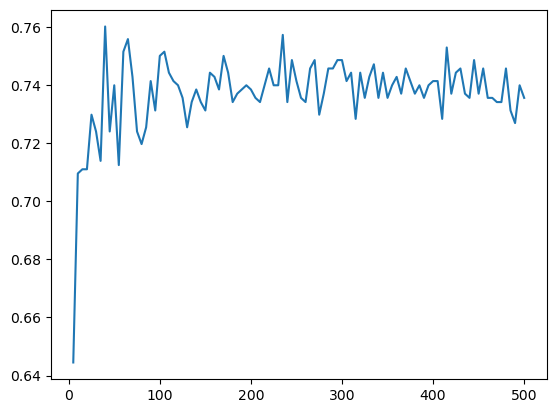

In [34]:
accuracy.clear()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

for i in range(1,101):
    clf = RandomForestClassifier(n_estimators=i*5)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))
    

plt.plot([(i*5) for i in range(1,101)], accuracy)
plt.show()

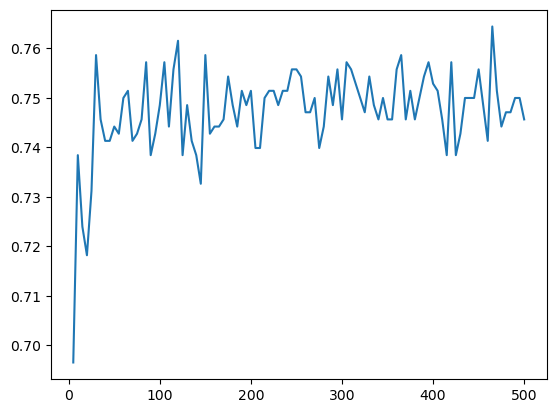

Score Max pour n_estimator : 200 :  0.7514450867052023
ValeurMax :  0.7644508670520231  valeurMin :  0.6965317919075145
Moyenne:  0.7472976878612717 Ecart type:  0.008893226078268078
variance :  7.908947007918744e-05


In [38]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
accuracy = []
score = 0

for i in range(1,101):
    clf = ExtraTreesClassifier(n_estimators=i*5)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))
    if i*5 == 200:
        score = clf.score(X_test,y_test)
            
plt.plot([(i*5) for i in range(1,101)], accuracy)
plt.show()

print("Score Max pour n_estimator : 200 : ", score)
print("ValeurMax : ", np.max(accuracy)," valeurMin : ", np.min(accuracy))
print("Moyenne: ", np.mean(accuracy), "Ecart type: ",np.std(accuracy))
variance = np.var(accuracy)
print("variance : ", variance)

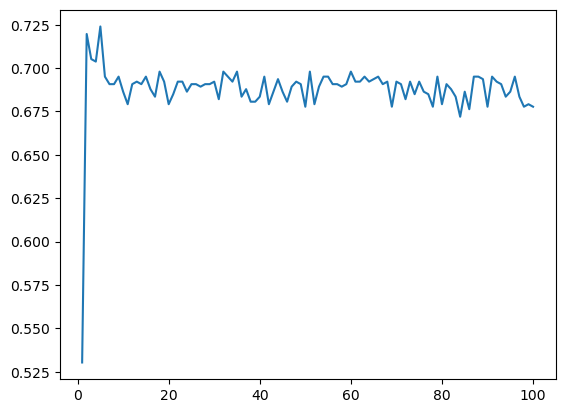

ValeurMax :  0.7239884393063584  avec max_depth =  4  valeurMin :  0.5303468208092486  avec max_depth =  0
Moyenne:  0.6879768786127167 Ecart type:  0.017684082863654284
variance :  0.0003127267867285911


In [46]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

score = []

a = range(1,101)
for i in range(1,101):
    clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),
n_estimators=200, learning_rate=2)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    
plt.plot(a, score)
plt.show()

print("ValeurMax : ", np.max(score)," avec max_depth = ", score.index(np.max(score))," valeurMin : ", np.min(score)," avec max_depth = ", score.index(np.min(score)))
print("Moyenne: ", np.mean(score), "Ecart type: ",np.std(score))
variance = np.var(score)
print("variance : ", variance)


In [52]:
import warnings

warnings.simplefilter("ignore")

accuracy = []
maximum = 0
minimum = 100 
maxI = 0
maxJ = 0
minI = 0
minJ = 0

n_estimator200Learning_rate4 = 0
n_estimator200Learning_rate10 = 0 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

for i in range(1,51):
    for j in range(1,51):
        clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
n_estimators=i*5, learning_rate=j*0.5)
        clf.fit(X_train, y_train)
        if clf.score(X_test,y_test) > maximum :
            maximum = clf.score(X_test,y_test)
            maxI = i*5
            maxJ = j*0.5
        if clf.score(X_test,y_test) < minimum :
            minimum = clf.score(X_test,y_test)
            minI = i*5
            minJ = j*0.5
        accuracy.append(clf.score(X_test,y_test))
        if j*0.5 == 4 and i*5 == 200 :
            n_estimator200Learning_rate4 = clf.score(X_test,y_test)
        if j*0.5 == 10 and i*5 == 200 :
            n_estimator200Learning_rate10 = clf.score(X_test,y_test)
    
print("Score : ", np.max(accuracy), " pour n_estimators = ", maxI, " pour learning_rate = ",maxJ )
print("Score : ", np.min(accuracy), " pour n_estimators = ", minI, " pour learning_rate = ",minJ )
print("Score pour n_estimator 200 et Learning_rate 4 : ", n_estimator200Learning_rate4)
print("Score pour n_estimator 200 et Learning_rate 10 : ", n_estimator200Learning_rate10)

Score :  0.7528901734104047  pour n_estimators =  165  pour learning_rate =  2.0
Score :  0.5563583815028902  pour n_estimators =  40  pour learning_rate =  25.0
Score pour n_estimator 200 et Learning_rate 4 :  0.6950867052023122
Score pour n_estimator 200 et Learning_rate 10 :  0.6893063583815029
